In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset

sales_dataset = pd.read_csv("advertising.csv")

In [3]:
# Quick overview of the dataset

print(sales_dataset.head(10))
print(sales_dataset.shape)
print(sales_dataset.describe())
print(sales_dataset.isnull().sum())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2
8    8.6    2.1        1.0    4.8
9  199.8    2.6       21.2   15.6
(200, 4)
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


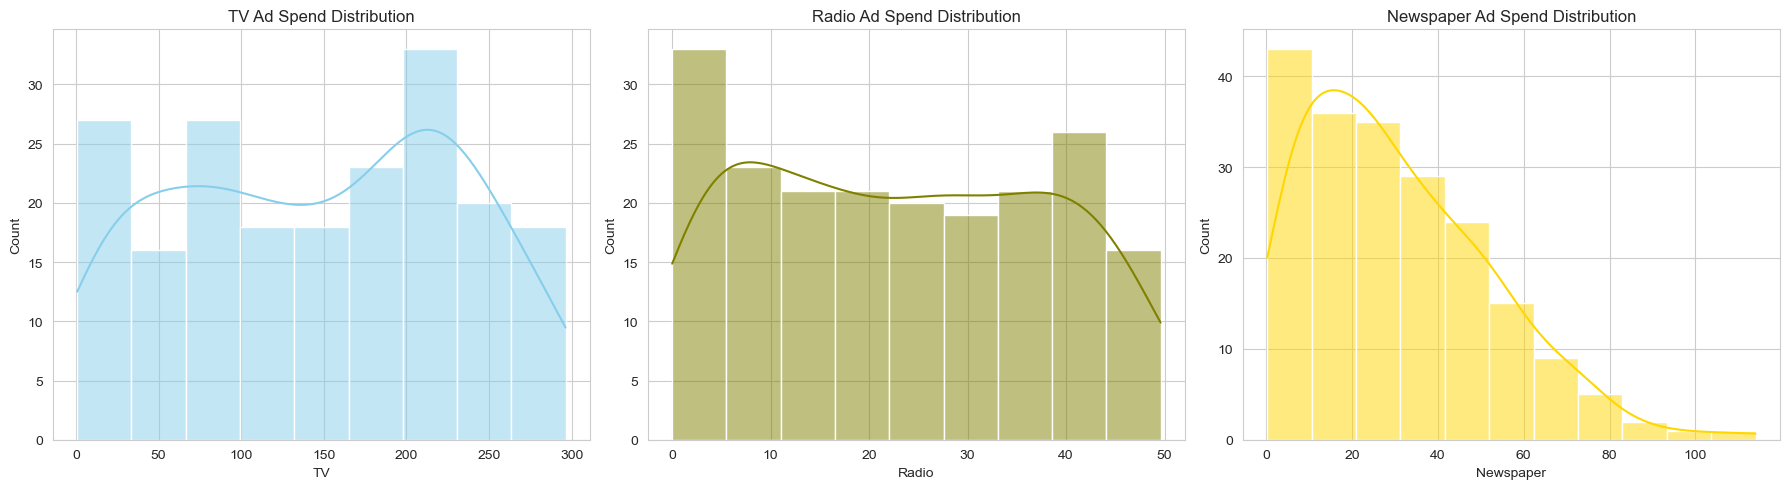

In [5]:
# Setup for seaborn

sns.set_style("whitegrid")

# Distributions of advertising expenses

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(sales_dataset['TV'], ax=axes[0], color="skyblue", kde=True).set_title('TV Ad Spend Distribution')
sns.histplot(sales_dataset['Radio'], ax=axes[1], color="olive", kde=True).set_title('Radio Ad Spend Distribution')
sns.histplot(sales_dataset['Newspaper'], ax=axes[2], color="gold", kde=True).set_title('Newspaper Ad Spend Distribution')
plt.tight_layout()

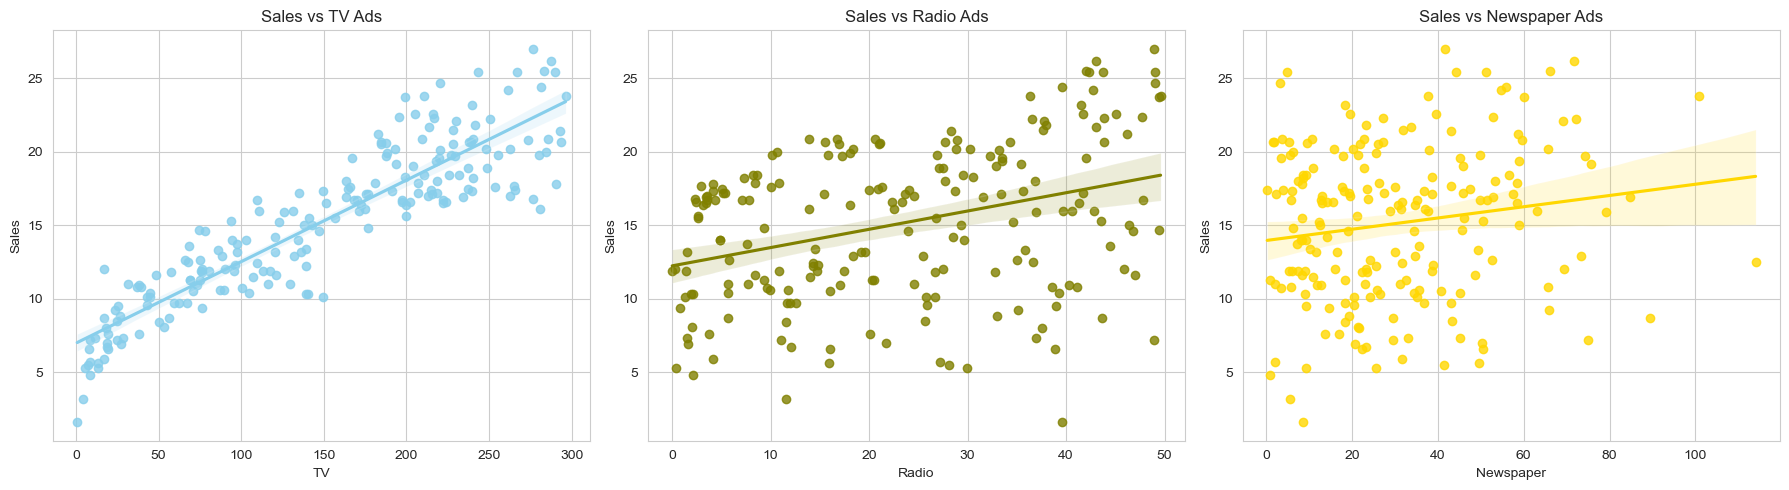

In [6]:
# Scatter plots

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.regplot(x='TV', y='Sales', data=sales_dataset, ax=axes[0], color="skyblue").set_title('Sales vs TV Ads')
sns.regplot(x='Radio', y='Sales', data=sales_dataset, ax=axes[1], color="olive").set_title('Sales vs Radio Ads')
sns.regplot(x='Newspaper', y='Sales', data=sales_dataset, ax=axes[2], color="gold").set_title('Sales vs Newspaper Ads')
plt.tight_layout()

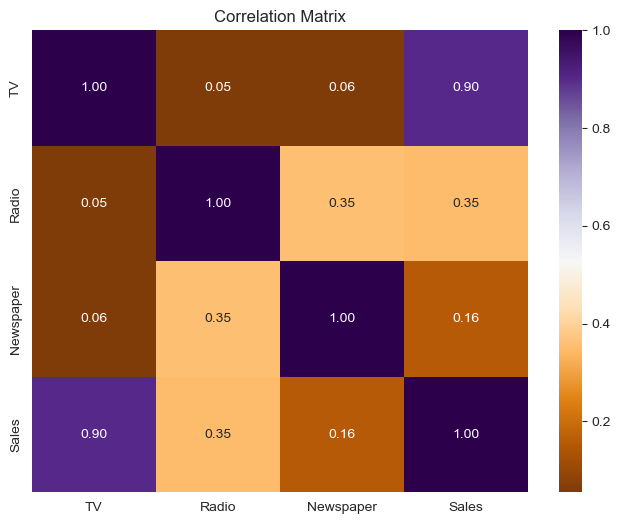

In [7]:
# Correlation matrix 

plt.figure(figsize=(8, 6))
sns.heatmap(sales_dataset.corr(), annot=True, fmt=".2f", cmap='PuOr')
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Preparing data for modeling

feature_columns = sales_dataset.drop('Sales', axis=1)
sales_target = sales_dataset['Sales']

In [9]:
# Splitting the dataset

feature_train, feature_test, target_train, target_test = train_test_split(feature_columns, sales_target, test_size=0.3, random_state=100)

In [10]:
# Model training

sales_model = LinearRegression()
sales_model.fit(feature_train, target_train)

LinearRegression()

In [11]:
# Predictions

sales_predictions = sales_model.predict(feature_test)
print(sales_predictions)

[ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


In [12]:
# Model details

print("Intercept:", sales_model.intercept_)
print("Coefficients:", sales_model.coef_)

Intercept: 4.334595861728431
Coefficients: [0.05382911 0.11001224 0.00628995]


In [13]:
# Accuracy

model_performance = sales_model.score(feature_test, target_test) * 100
print(f"Model Performance: {model_performance:.2f}%")

Model Performance: 86.56%
